In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def get_random_value():
    N = 100000
    return random.randint(0, N - 1) / N

def get_numbers_of_elements(probability, experiments):
    numbers_of_elements = np.zeros(experiments, dtype=int)

    for i in range(experiments):
        count = 1
        while get_random_value() >= probability:
            count += 1
        numbers_of_elements[i] = count

    return numbers_of_elements.tolist()

In [4]:
def get_statistical_table(source_list, experiments):
    max_number = max(source_list)

    random_variables = [int(var) for var in range(1, max_number + 1)
                                          if var in source_list]

    numbers_of_random_variables = [int(source_list.count(num))
                                            for num in range(1, max_number + 1)
                                            if num in source_list]

    frequencies_of_random_variables = [num / experiments
                                      for num in numbers_of_random_variables]

    columns = list(range(1, len(random_variables) + 1))
    data = [
        [str(v) for v in random_variables],
        [str(v) for v in numbers_of_random_variables],
        frequencies_of_random_variables
    ]

    df = pd.DataFrame(data, index=['yi', 'ni', 'ni/n'], columns=columns)
    pd.set_option('display.max_columns', None)

    return df

In [5]:
P = lambda p, x: (1 - p) ** (x - 1) * p

def geometric_distribution(p, k):
    probability = 0
    for n in range(1, k):
        probability += P(p, n)
    return probability

def sample_distribution(sample, n, x):
    frequency = 0
    for num in sample:
        if num < x:
            frequency += 1
    return frequency / n

In [6]:
def get_expectation(p):
    return 1 / p

def get_sample_average(sample_values, experiments):
    return sum(sample_values) / experiments

def get_variance(p):
    return (1 - p) / (p ** 2)

def get_sample_variance(sample_values, experiments):
    sample_variance = 0
    sample_average = get_sample_average(sample_values, experiments)

    for num in sample_values:
        sample_variance += (num - sample_average)**2

    sample_variance /= experiments
    return sample_variance

def get_sample_median(sample_values, experiments):
    if (experiments % 2 != 0):
        return sample_values[len(sample_values) // 2]
    else:
        middle = experiments // 2
        return (sample_values[middle] + sample_values[middle - 1]) / 2

def get_sample_size(sample_values):
    return sample_values[-1] - sample_values[0]

In [7]:
def get_characteristics_table(table, sample, prob, experiments):
    values = table.loc['yi']
    counts = table.loc['ni']
    freqs = table.loc['ni/n']
    sample.sort()

    expectation = get_expectation(prob)
    sample_average = get_sample_average(numbers, experiments)
    variance = get_variance(prob)
    sample_variance = get_sample_variance(numbers, experiments)

    characteristics = [
        expectation,
        sample_average,
        abs(expectation - sample_average),
        variance,
        sample_variance,
        abs(variance - sample_variance),
        get_sample_median(numbers, n),
        get_sample_size(numbers)
    ]
    decimal_places = 5

    chars = ['Eη', 'x̅', '|Eη - x̅|', 'Dη', 'S²', '|Dη - S²|', 'M̂', 'R̂']
    char_vals = [round(char, decimal_places) for char in characteristics]

    data2 = dict(zip(chars, char_vals))

    df = pd.DataFrame(data2, index=[''])

    return df

In [8]:
def gamma_function(r):
    if r <= 0:
        return 0;
    if round(r, 2) == 1:
        return 1
    if round(r, 2) == 0.5:
        return np.sqrt(np.pi)
    return (r - 1) * gamma_function(r - 1)

def calculate_integral(func, r, a: float, b: float):
    result = 0.0
    n = 10000
    for k in range(1, n + 1):
        result += (func(r, a + (b - a) * (float(k) - 1) / float(n)) +
                   func(r, a + (b - a) * float(k) / float(n))) * (b - a) / (2.0 * float(n))
    return result

def chi_square(r, x: float):
    return (1.0 / (2.0 ** (float(r) / 2.0))) * (1.0 / gamma_function(float(r) / 2.0)) * (x ** (float(r) / 2.0 - 1.0)) * (1.0 / np.exp(x / 2.0))

**Первая часть:**

In [37]:
task_text = ''' ЭВМ генерирует последовательность чисел до получения некоторого
заданного числа. Вероятность генерации этого числа на каждом шаге
независимо от других шагов равна p. С.в. η — число элементов полу-
ченной последовательности.
'''

print("Содержание задачи:\n")
print(task_text)

p = float(input("Вероятность генерации заданного числа p = "))
n = int(input("Число экспериментов n = "))

numbers = get_numbers_of_elements(p, n)
table = get_statistical_table(numbers, n)

print("\nРезультаты:\n")

table

Содержание задачи:

 ЭВМ генерирует последовательность чисел до получения некоторого
заданного числа. Вероятность генерации этого числа на каждом шаге
независимо от других шагов равна p. С.в. η — число элементов полу-
ченной последовательности.

Вероятность генерации заданного числа p = 0.01
Число экспериментов n = 100000

Результаты:



,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732
yi,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,

**Вторая часть:**

In [38]:
values = table.loc['yi']
counts = table.loc['ni']
freqs = table.loc['ni/n']
numbers.sort()

discrepancy = [max(j / n - geometric_distribution(p, numbers[j - 1]),
                    geometric_distribution(p, numbers[j - 1]) - (j - 1) / n)
                    for j in range(1, n + 1)]

char_table = get_characteristics_table(table, numbers, p, n)
print("Мера расхождения: D = ", max(discrepancy), "\n")
char_table

Мера расхождения: D =  0.01031 



,Eη,x̅,|Eη - x̅|,Dη,S²,|Dη - S²|,M̂,R̂
,100.0,99.94068,0.05932,9900.0,9871.7386,28.2614,69.0,1081


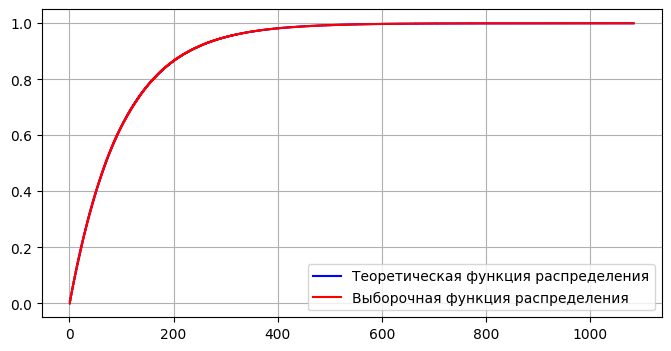


 Максимальное отклонение:  0.000677192872036326 



,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732
yj,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,

In [39]:
args = range(1, max(numbers) + 2)

vals1 = []
for arg in args:
    vals1.append(geometric_distribution(p, arg))

plt.figure(figsize=(8, 4))
plt.step(list(args), vals1, color='b', label='Теоретическая функция распределения')
plt.grid(True)
plt.legend()

vals2 = []
for arg in args:
    vals2.append(sample_distribution(numbers, n, arg))

plt.step(list(args), vals2, color='r', label='Выборочная функция распределения')
plt.grid(True)
plt.legend()

plt.show()

probabilities = [P(p, float(yj)) for yj in values]
deviations = [abs(float(nj) / n - pj) for pj, nj in zip(probabilities, counts)]

columns = list(range(1, len(values) + 1))
data3 = [
    list(values),
    probabilities,
    list(freqs)
]
df = pd.DataFrame(data3, index=['yj', 'P({η=yj})', 'nj/n'], columns=columns)

print("\n Максимальное отклонение: ", max(deviations), "\n")

df

In [40]:
k = int(input("Число интервалов: "))
interval_boundaries = []
for i in range(1, k):
    interval_boundaries.append(str(input(f"{i}-ая граница: ")))

intervals = []
interval_n = []
current_start = 0
values = list(values)
counts = list(counts)
for boundary in interval_boundaries:
    bound_index = values.index(boundary)
    intervals.append([int(values[i]) for i in range(current_start, bound_index)])
    interval_n.append(sum([int(counts[j]) for j in range(current_start, bound_index)]))
    current_start = bound_index
intervals.append([int(values[i]) for i in range(current_start, len(values))])
interval_n.append(sum([int(counts[j]) for j in range(current_start, len(values))]))

q = []

for interval in intervals:
    q.append(geometric_distribution(p, interval[-1]) - geometric_distribution(p, interval[0]))

R0 = 0.0
for j in range(k):
    R0 += (interval_n[j] - n * q[j]) ** 2 / (n * q[j])

R0

Число интервалов: 10
1-ая граница: 100
2-ая граница: 200
3-ая граница: 300
4-ая граница: 400
5-ая граница: 500
6-ая граница: 600
7-ая граница: 700
8-ая граница: 800
9-ая граница: 900


12.064951476158134

In [45]:
alpha = float(input("Уровень значимости: "))
F = 1 - calculate_integral(chi_square, k - 1, 0.0, R0)
print("F(R0) = ", F)
if (F < alpha):
    print("Гипотеза отвергается")
else:
    print("Гипотеза принимается")

Уровень значимости: 0.1
F(R0) =  0.20967237720180631
Гипотеза принимается
